# INF367: MANDATORY 1

## Group 4: Snorre Solli Håland, Runar Fosse, Sander Marx

## Imports

In [1]:
from qiskit import QuantumCircuit, assemble, execute
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import array_to_latex, plot_histogram
from qiskit.extensions import UnitaryGate
import numpy as np
import math
import cmath

## Helper code

In [2]:
backend = QasmSimulator()

ket0 = np.matrix([1,0]).reshape(2,1)
ket1 = np.matrix([0,1]).reshape(2,1)

#Get statevector from circuit
def GetStateVector(circ):

    #Save the state vector
    circ.save_statevector()

    #Execute & get result
    job = execute(circ, backend, seed_simulator=123)
    job_result = job.result()

    #Return state vector
    return job_result.get_statevector(circ)


# helper function for shots
def Exec(circ, num_of_shots = 1000):

    #Execute & get result
    job = execute(circ, backend,shots = num_of_shots, seed_simulator=123)
    job_result = job.result()

    #Return counts
    return job_result.get_counts()    

## Task 1.1

### 1

In [3]:
#Construct quantom circuit with 4 qbits and 4 classical bits
qc = QuantumCircuit(4,4)

# Apply X gates to qubits 0, 1, and 2 to get |0111⟩ since the bits are reversed from right to left
qc.x(0)
qc.x(1)
qc.x(2)

# Next, we create a superposition of |0111⟩ and |1111⟩ by applying a Hadamard gate to qubit 3.
qc.h(3)

# To transform |1111⟩ into |1000⟩, we apply a series of CNOT gates.
# Control qubit will be qubit 3 and target qubits will be 0, 1, 2.
qc.cx(3, 0)
qc.cx(3, 1)
qc.cx(3, 2)

# Finally, we need to introduce the imaginary unit i to the amplitude of |1000⟩, by applying an S gate to qubit 3.
qc.s(3)

array_to_latex(GetStateVector(qc), max_size=16)

<IPython.core.display.Latex object>

Initialize to 0000


X gates to qubits 0, 1, and 2 to get 0111

Hadamard gate to qubit 3 to make a superposition of 0111 and 1111

CNOT gates controlled on qubit 3 to flip qubits 0, 1, and 2 

S gate to qubit 3 to introduce i to the 1000


### 2

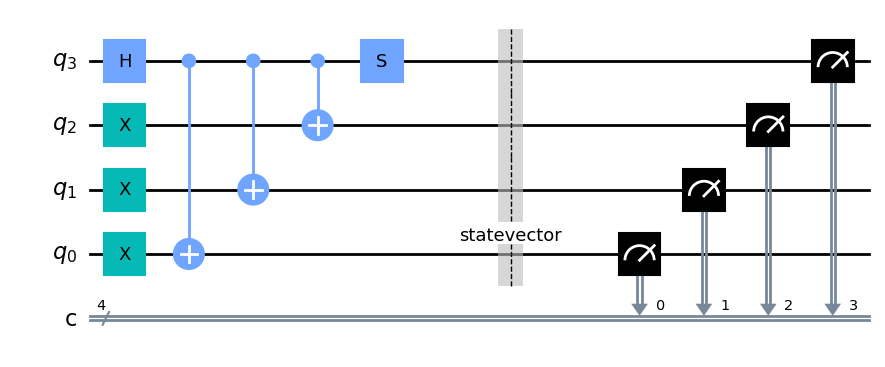

In [4]:
# Visualize the Circuit
qc.measure(0, 0)
qc.measure(1, 1)
qc.measure(2, 2)
qc.measure(3, 3)
qc.draw('mpl', reverse_bits = True)

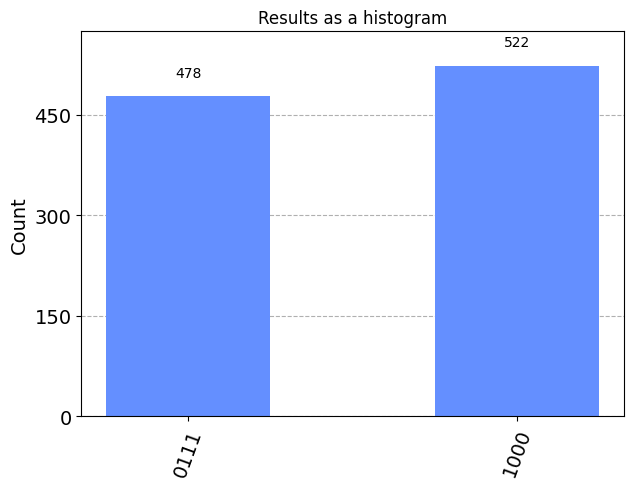

In [5]:
plot_histogram(Exec(qc),title='Results as a histogram')

We now want to reverse our gates, so that we go back to state 0000

### 3

In [6]:
#Create a new circuit 
i_qc = QuantumCircuit(4,4)

i_qc.x(0)
i_qc.x(1)
i_qc.x(2)


i_qc.h(3)


i_qc.cx(3, 0)
i_qc.cx(3, 1)
i_qc.cx(3, 2)

i_qc.s(3)

#Then we apply the composite conjugate gates in reverse order from end to start

i_qc.sdg(3)

# cx_dag = cx
i_qc.cx(3, 2)
i_qc.cx(3, 1)
i_qc.cx(3, 0)


# h_dag = h
i_qc.h(3)

# X_dag = x
i_qc.x(2)
i_qc.x(1)
i_qc.x(0)

#Check if we go back to |0000>
array_to_latex(GetStateVector(i_qc), max_size=16)

<IPython.core.display.Latex object>

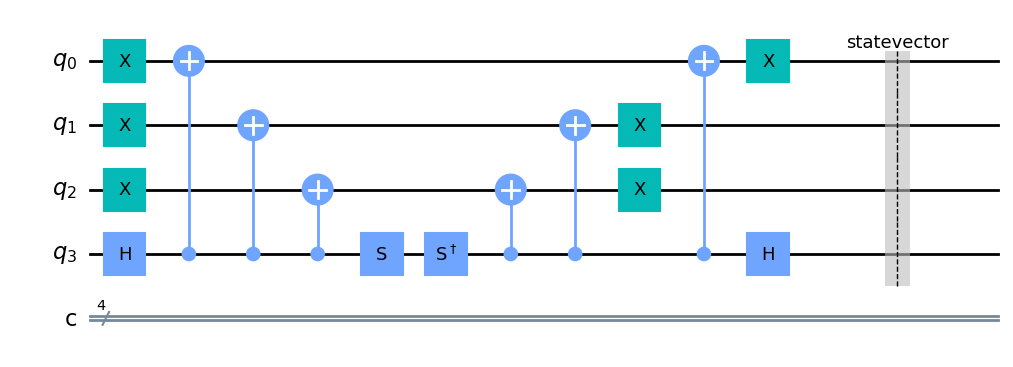

In [7]:
#Draw circuit
i_qc.draw('mpl')

## Task 1.2

In [8]:
qc_z = QuantumCircuit(1,1)

qc_z.x(0)
qc_z.h(0)
qc_z.tdg(0)
qc_z.h(0)
qc_z.y(0)
qc_z.rx(1.3, 0)
qc_z.s(0)

print("state vector: ")
stateVector = GetStateVector(qc_z)
array_to_latex(stateVector)

state vector: 


<IPython.core.display.Latex object>

In [9]:
# Rewrite to the form |ψ⟩ = r · |0⟩ + s · e^iα · |1⟩st

#Calculate r and s
svr = np.sqrt((-0.192830629)**2 + (-0.4655343198)**2)
svs = np.sqrt((-0.3305494788)**2 + (-0.7980170347)**2)

#calculate the relative phase phase2 - phase1
phase1 = np.arctan(-0.4655343198/-0.192830629)
phase2 = np.arctan(0.7980170347/0.3305494788)

#Find phase alpha α
svalpha = phase2-phase1

print("The relative phase of our state vector is: ", svalpha)

#Calculate the pure statevector
pureStateVector = svr*ket0 + svs*cmath.exp(svalpha*1j)*ket1

#print both the coeff
array_to_latex(pureStateVector)

The relative phase of our state vector is:  -4.477196391405869e-11


<IPython.core.display.Latex object>

Since the relative phase is so close to 0 then we can set it to 0.
Our pure state then looks like this:

$
|ψ⟩ = r · |0⟩ + s · e^{iα} · |1⟩
$

$
|ψ⟩ = 0.504 · |0⟩ + 0.864 · |1⟩
$


circuit with standard measurment


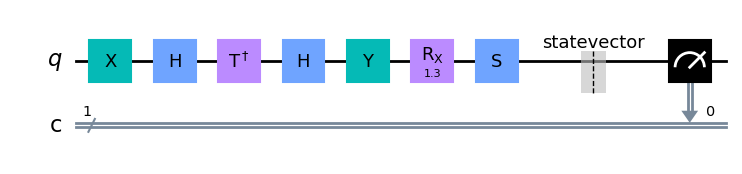

In [10]:
qc_z.measure(0, 0)
print("circuit with standard measurment")
qc_z.draw('mpl')

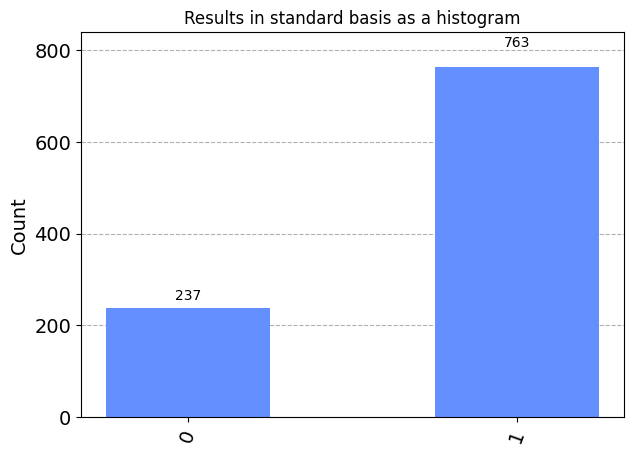

In [11]:
counts_z = Exec(qc_z)
plot_histogram(counts_z,title='Results in standard basis as a histogram')

From https://quantumcomputing.stackexchange.com/questions/13605/how-to-measure-in-another-basis we apply H gate for X basis and we apply a Sdg and H gate for Y basis

In [12]:

qc_x = QuantumCircuit(1,1)

qc_x.x(0)
qc_x.h(0)
qc_x.tdg(0)
qc_x.h(0)
qc_x.y(0)
qc_x.rx(1.3, 0)
qc_x.s(0)


circuit with standard measurment


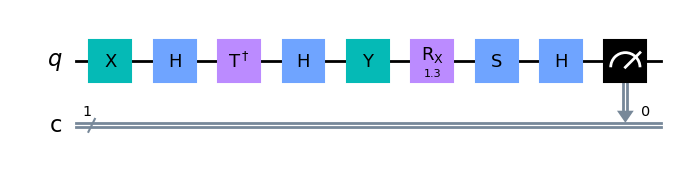

In [13]:
qc_x.h(0)
qc_x.measure(0, 0)
print("circuit with standard measurment")
qc_x.draw('mpl')

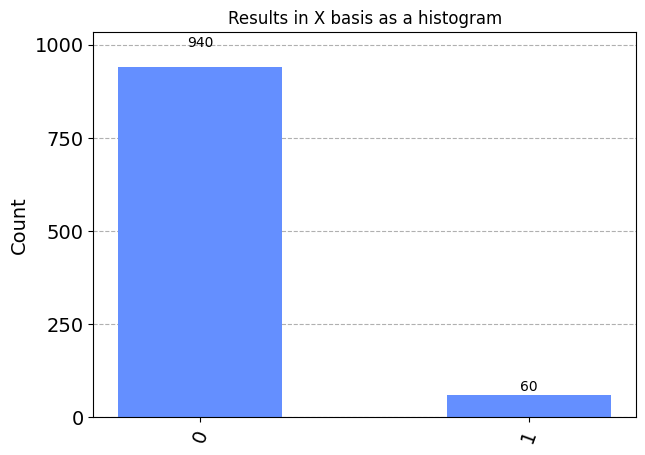

In [14]:
counts_x = Exec(qc_x)
plot_histogram(Exec(qc_x),title='Results in X basis as a histogram')

In [15]:
qc_y = QuantumCircuit(1,1)

qc_y.x(0)
qc_y.h(0)
qc_y.tdg(0)
qc_y.h(0)
qc_y.y(0)
qc_y.rx(1.3, 0)
qc_y.s(0)

circuit with standard measurment


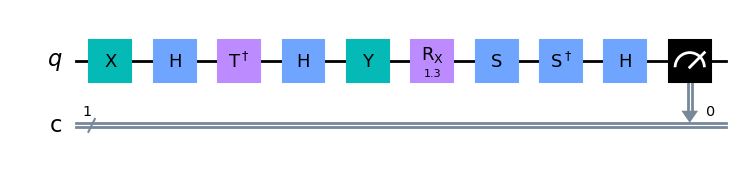

In [16]:
qc_y.sdg(0)
qc_y.h(0)
qc_y.measure(0, 0)
print("circuit with standard measurment")
qc_y.draw('mpl')

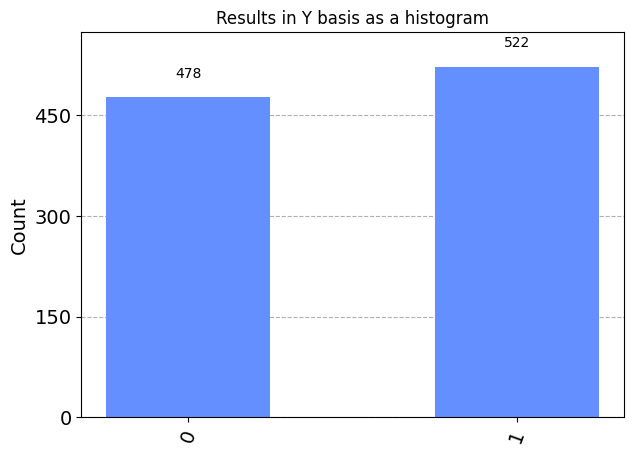

In [17]:
counts_y = Exec(qc_y)
plot_histogram(Exec(qc_y),title='Results in Y basis as a histogram')

We have our pure state

$
|ψ⟩ = r · |0⟩ + s · e^{iα} · |1⟩
$

We rewrite
$
e^{iα}= a + bi ⇔ α = cos^{−1}a = sin^{−1} b
$


We can find $r$ and $s$ from our measurment in standard basis

$
r = \sqrt{\frac{237}{1000}} = 0.487
$

$
s = \sqrt{\frac{763}{1000}} = 0.873
$


We can find $a$ from X basis : $a = {\frac{1.76}{4rs}} = {\frac{1.76}{4·0.487·0.873}} = 1.035$

Since we cannot do inverse cos for a value over 1.0 to find α we hvae to round 1.035 down to 1.0
Effectivly giving us an α = 0.


We can find $b$ from Y basis : $b = {\frac{-0.088}{4rs}} = {\frac{-0.088}{4·0.487·0.873}} = -0.052$


We find $α$ by finding the value of $cos^{−1}{a}$ 

And by finding the value of $sin^{−1}{b}$

Then we compare and find the two values that are the same

$
a = 1.0, b = -0.052
$

$
α = cos^{−1}{a} = sin^{−1}{b}
$

$
α = 0
$

In [18]:
def  reconstruct_state(std_1, std_2, x_1, x_2, y_1, y_2):
    # Get the total counts, r and s
    counts = (std_1 + std_2)
    r = np.sqrt(std_1/counts)
    s = np.sqrt(std_2/counts)
    
    #Find a
    a = (((x_1/counts) -(x_2/counts))  * 2)/(4*r*s)
    
    #Find b
    b = (((y_1/counts) -(y_2/counts))  * 2)/(4*r*s)

    #If a is outside the bound -1 to 1 then we round to 1 or -1
    if a>= 1:
        a = 1.00
    if a<= -1:
        a = -1.00
    
    #If b is outside the bound -1 to 1 then we round to 1 or -1
    if b>= 1:
        b = 1.00
    if b<= -1:
        b = -1.00

    #Collect the sine and cos of a and b in own arrays 
    avals = []
    bvals = []
    
    cosa = np.arccos(a)
    avals.append(cosa)
    avals.append(2*np.pi - cosa)
    
    sinb = np.arcsin(b)
    bvals.append(sinb)
    bvals.append(np.pi - sinb)    
    

    # Round the arrays to 1 decimal place
    rounded_array1 = [math.floor(x*10)/10 for x in avals]
    rounded_array2 = [math.ceil(x*10)/10 for x in bvals]
    
    #Get the intersection value between the two arrays and use this as the alpha.
    alpha = np.intersect1d(rounded_array1, rounded_array2)[0]
    
    
    statevector_constructed = r*ket0 + s*cmath.exp(alpha*1j)*ket1
    return statevector_constructed

In [19]:
#Get the counts

#Z basis
h = counts_z['0']
i = counts_z['1']

#X basis
j = counts_x['0']
k = counts_x['1']

#Y basis
l = counts_y['0']
m = counts_y['1']

#get the reconstructed states from the counts from z,x and y bases
statevector_constructed = reconstruct_state(h,i,j,k,l,m)



We get the counts from the different bases (Z, X and Y) and then use those counts to reconstruct the state in the form
$
|ψ⟩ = r · |0⟩ + s · e^{iα} · |1⟩
$

And compare to the pureStateVector from circuit. We get:

In [20]:
array_to_latex(statevector_constructed)

<IPython.core.display.Latex object>

In [21]:
array_to_latex(pureStateVector)

<IPython.core.display.Latex object>

As we can see the two states are not exactly the same, but we get a good apporximation.

The main difference is the imaginary part, since we rounded a to 1.0 we get α = 0 while in realiy α is -0.045 but since this value is so small we can overlook it. And get the reconstructed state:

$
|ψ⟩ = 0.487 · |0⟩ + 0.872 · |1⟩
$


Comparing the vectors we get the differences:

The difference in r is = 0.017

The difference in s is = 0.008


In [22]:
print(statevector_constructed * np.exp(1.95j))

[[-0.18021382+0.45224217j]
 [-0.32335248+0.81144511j]]
